In [9]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np

%matplotlib inline
%run f2forecast.py
import xlwings as xw

df=pd.read_excel("C:\Prog\ML_AI\TimeSeries\ML_AI\Time series analysis\StudConsumption\Cur\Data\Март.xlsx")
M = [];
T = [];
W = [];
Th = [];
F = [];
Sa = [];
Su = [];


One = [];
Two = [];
Three = [];
Four = [];
Five = [];
Six = [];
Seven = [];
Eight = [];
Nine = [];
Ten = [];
Eleven = [];
Twelve = [];
Thirteen = [];
Fourteen = [];
Fifteen = [];
Sixteen = [];
Seventeen = [];
Eighteen = [];
Nineteen = [];
Twenty=[];
TwentyOne=[];
TwentyTwo = [];
TwentyThree = [];
TwentyFour =[];

WorkOrHolid = [];

def weekDay(year, month, day):
    offset = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]
    week   = ['Sunday', 
              'Monday', 
              'Tuesday', 
              'Wednesday', 
              'Thursday',  
              'Friday', 
              'Saturday']
    afterFeb = 1
    if month > 2: afterFeb = 0
    aux = year - 1700 - afterFeb
    # dayOfWeek for 1700/1/1 = 5, Friday
    dayOfWeek  = 5
    # partial sum of days betweem current date and 1700/1/1
    dayOfWeek += (aux + afterFeb) * 365                  
    # leap year correction    
    dayOfWeek += aux / 4 - aux / 100 + (aux + 100) / 400     
    # sum monthly and day offsets
    dayOfWeek += offset[month - 1] + (day - 1)               
    dayOfWeek %= 7
    return dayOfWeek
data=df['Data'];
for i in range(len(df["Ставка"])):
    #print(i)
    Day = weekDay(int(data[i].year), int(data[i].month), int(data[i].day));
    #print(int(Day))
    if int(Day) == 1:
        M.append(1)
        T.append(0)
        W.append(0)
        Th.append(0)
        F.append(0)
        Sa.append(0)
        Su.append(0)
        WorkOrHolid.append(1)
    if int(Day) == 2:
        M.append(0)
        T.append(1)
        W.append(0)
        Th.append(0)
        F.append(0)
        Sa.append(0)
        Su.append(0)
        WorkOrHolid.append(1)
    if int(Day) == 3:
        M.append(0)
        T.append(0)
        W.append(1)
        Th.append(0)
        F.append(0)
        Sa.append(0)
        Su.append(0)
        WorkOrHolid.append(1)
    if int(Day) == 4:
        M.append(0)
        T.append(0)
        W.append(0)
        Th.append(1)
        F.append(0)
        Sa.append(0)
        Su.append(0)
        WorkOrHolid.append(1)
    if int(Day) == 5:
        M.append(0)
        T.append(0)
        W.append(0)
        Th.append(0)
        F.append(1)
        Sa.append(0)
        Su.append(0)
        WorkOrHolid.append(1)
    if int(Day) == 6:
        M.append(0)
        T.append(0)
        W.append(0)
        Th.append(0)
        F.append(0)
        Sa.append(1)
        Su.append(0)
        WorkOrHolid.append(0)
    if int(Day) == 0:
        M.append(0)
        T.append(0)
        W.append(0)
        Th.append(0)
        F.append(0)
        Sa.append(0)
        Su.append(1)
        WorkOrHolid.append(0)
Hour=[]
flag=0;
for i in range(len(df['Ставка'])):
    Hour.append(flag);
    flag+=1;
    if(flag==24):
        flag=0
print(len(Hour))
HourInDay = {
'0' : [],
'1' : [],
'2' :[],
'3' : [],
'4' : [],
'5' : [],
'6' : [],
'7' : [],
'8' : [],
'9' : [],
'10' : [],
'11' : [],
'12':[],
'13' : [],
'14' : [],
'15' : [],
'16' : [],
'17' : [],
'18' :[],
'19' : [],
'20' :[],
'21' :[],
'22' : [],
'23' : []
#'24 ' : [];
}
for i in Hour:
    for key in HourInDay:
        #print(key,"=",i)
        if int(i) == int(key):
            #print(key)
            HourInDay[key].append(1)
        else:
             HourInDay[key].append(0)
                
Temp = df["T"]
TempSquare = [];
Trend = [];

for i in range(len(df["Ставка"])):
    TempSquare.append(Temp[i]*Temp[i]);
    Trend.append(i);


# инструментальная переменная  для ставки(Скользящее средние для ставки)
DfStav = pd.DataFrame({'Stav': df['Ставка']})


# Tail-rolling average transform
rolling = DfStav.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
#DfStav.plot()
#rolling_mean.plot(color='red')
print(len(rolling_mean))
rolling_mean["Stav"][0]=(rolling_mean["Stav"][2]+rolling_mean["Stav"][3]) / 2;
rolling_mean["Stav"][1]=(rolling_mean["Stav"][3]+rolling_mean["Stav"][4]) / 2;

744
          Stav
0          NaN
1          NaN
2  2174.933333
3  2179.323333
4  2184.140000
5  2187.780000
6  2189.403333
7  2186.150000
8  2182.236667
9  2179.086667
744


In [10]:
df = pd.DataFrame({'Data': df['Data'], 
                   'Потребление':df['Потребление'] , 
                   "Ставка":df["Ставка"],
                    "T":  df["T"],
                    "Po ": df["Po "],
                   " P ":  df[" P "],
                    "Pa ": df["Pa "],
                   " U ": df[" U "],
                    "Ff ": df["Ff "],
                   "Рабочий/Выходной":WorkOrHolid,
                   "КвадратТемпературы":TempSquare,
                   "Тренд":Trend,
                   #"Долгота":[i for i in Long['Long']],
                   #"КвадратДолготы":[i*i for i in Long['Long']],
                   "Ставка(t-1)":[i for i in rolling_mean['Stav']],
'0':[i for i in HourInDay["0"]],
'1' :[i for i in HourInDay["1"]],
'2' :[i for i in HourInDay["2"]],
'3' :[i for i in HourInDay["3"]],
'4' :[i for i in HourInDay["4"]],
'5' :[i for i in HourInDay["5"]],
'6' :[i for i in HourInDay["6"]],
'7' :[i for i in HourInDay["7"]],
'8' :[i for i in HourInDay["8"]],
'9' :[i for i in HourInDay["9"]],
'10' :[i for i in HourInDay["10"]],
'11' :[i for i in HourInDay["11"]],
'12' :[i for i in HourInDay["12"]],
'13' :[i for i in HourInDay["13"]],
'14' :[i for i in HourInDay["14"]],
'15' :[i for i in HourInDay["15"]],
'16' :[i for i in HourInDay["16"]],
'17' :[i for i in HourInDay["17"]],
'18' :[i for i in HourInDay["18"]],
'19' :[i for i in HourInDay["19"]],
'20' :[i for i in HourInDay["20"]],
'21' :[i for i in HourInDay["21"]],
'22' :[i for i in HourInDay["22"]],
'23' :[i for i in HourInDay["23"]],
'M':M,
'T':T,
'W':W,
'Th':Th,
'F':F,
'Sa':Sa,
'Su':Su
                  })
df

,Data,Потребление,Ставка,T,Po,P,Pa,U,Ff,Рабочий/Выходной,...,20,21,22,23,M,W,Th,F,Sa,Su
0,2017-03-01 00:00:00,19.776,2169.52,0,728.2,773.4,-1.5,76,2,1,...,0,0,0,0,0,1,0,0,0,0
1,2017-03-01 01:00:00,25.608,2175.28,0,728.2,773.4,-1.5,76,2,1,...,0,0,0,0,0,1,0,0,0,0
2,2017-03-01 02:00:00,23.808,2180.00,0,728.2,773.4,-1.5,76,2,1,...,0,0,0,0,0,1,0,0,0,0
3,2017-03-01 03:00:00,23.664,2182.69,0,726.2,771.2,-2.0,77,2,1,...,0,0,0,0,0,1,0,0,0,0
4,2017-03-01 04:00:00,20.736,2189.73,0,726.2,771.2,-2.0,77,2,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,2017-03-31 19:00:00,19.944,2076.96,0,721.9,764.3,2.0,47,1,1,...,0,0,0,0,0,0,0,1,0,0
740,2017-03-31 20:00:00,15.336,2075.92,0,721.9,764.3,2.0,47,1,1,...,1,0,0,0,0,0,0,1,0,0
741,2017-03-31 21:00:00,14.328,2067.67,0,723.8,766.3,1.9,53,1,1,...,0,1,0,0,0,0,0,1,0,0
742,2017-03-31 22:00:00,13.536,2067.38,0,723.8,766.3,1.9,53,1,1,...,0,0,1,0,0,0,0,1,0,0


In [11]:
df.columns

Index(['Data', 'Потребление', 'Ставка', 'T', 'Po ', ' P ', 'Pa ', ' U ', 'Ff ',
       'Рабочий/Выходной', 'КвадратТемпературы', 'Тренд', 'Ставка(t-1)', '0',
       '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', 'M', 'W',
       'Th', 'F', 'Sa', 'Su'],
      dtype='object')

In [12]:
col=[#'Data', 'Потребление', 
     'Ставка', 'T', 'Po ', ' P ', 'Pa ', ' U ', 'Ff ',
       'Рабочий/Выходной', 'КвадратТемпературы', 'Тренд', 'Ставка(t-1)', '0',
       '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', 'M', 'W',
       'Th', 'F', 'Sa', 'Su']
#Разделим на влияющие и целевую переменную
X=df[col]
Y=df['Потребление']
X=sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Потребление   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     93.01
Date:                Sat, 26 Sep 2020   Prob (F-statistic):          1.58e-246
Time:                        15:32:15   Log-Likelihood:                -1731.4
No. Observations:                 744   AIC:                             3541.
Df Residuals:                     705   BIC:                             3721.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 26.5855     16

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import string as string
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
inputdf = df.filter(items=[#'Data', 
    'Потребление', 'Ставка', 'T', 'Po ', ' P ', 'Pa ', ' U ', 'Ff ',
       'Рабочий/Выходной', 'КвадратТемпературы', 'Тренд', 'Ставка(t-1)', '0',
       '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', 'M', 'W',
       'Th', 'F', 'Sa', 'Su'])
features=inputdf
type(features)
#features.iloc[:,5:].head(5)
#features.head(5)
#features.info()
#features.columns
# Метки - это значения, которые мы хотим предсказать
labels = np.array(features['Потребление'])
# Удалить ярлыки из функций
# ось 1 относится к столбцам
features= features.drop('Потребление', axis = 1)
# Сохранение имен объектов для последующего использования
feature_list = list(features.columns)
# Преобразовать в массив NumPy
features = np.array(features)
# Использование Scikit-learn для разделения данных на обучающие и тестовые наборы
from sklearn.model_selection import train_test_split
# Разделить данные на обучающие и тестовые наборы
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 100)

print('Форма признаков обучения:', train_features.shape)
print('Форма меток обучения:', train_labels.shape)
print('Форма признаков тестирования:', test_features.shape)
print('Форма меток тестирования:', test_labels.shape)

Форма признаков обучения: (558, 41)
Форма меток обучения: (558,)
Форма признаков тестирования: (186, 41)
Форма меток тестирования: (186,)


In [14]:
# Импортируем используемую модель
from sklearn.ensemble import RandomForestRegressor
# Создание модели с 100 деревьями решений
#rf = RandomForestRegressor(n_estimators = 100, random_state = 100)
rf = RandomForestRegressor(n_estimators = 100, random_state = 100)
# Обучаем модель по выборки обучения
rf.fit(train_features, train_labels);

# Используйте метод прогнозирования леса на тестовых данных
predictions = rf.predict(test_features)
# Рассчитать абсолютные ошибки
errors = abs(predictions - test_labels)
# Вывести среднюю абсолютную ошибку (мАе)
print('Средняя абсолютная ошибка:', round(np.mean(errors), 2), 'кВт.')


# Рассчитать среднюю абсолютную процентную ошибку (MAPE)
mape = 100 * (errors / test_labels)
# Расчет и отображение точности
accuracy = 100 - np.mean(mape)
print('Точность:', round(accuracy, 2), '%.')

Средняя абсолютная ошибка: 2.04 кВт.
Точность: 91.5 %.


In [15]:
# Импорт инструментов, необходимых для визуализации
from sklearn.tree import export_graphviz
#import pydot
# Вытащи одно дерево из леса
tree = rf.estimators_[5]

# Получить числовые значения функций
importances = list(rf.feature_importances_)
# Список кортежей с переменной и важностью
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# # Сортировать значения функций по наиболее важным
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Распечатать функцию и значение
[print('Переменные: {:20} Важность: {}'.format(*pair)) for pair in feature_importances];

Переменные:  U                   Важность: 0.2
Переменные: 15                   Важность: 0.1
Переменные: 14                   Важность: 0.08
Переменные: Pa                   Важность: 0.06
Переменные: 22                   Важность: 0.05
Переменные: 23                   Важность: 0.05
Переменные: Ставка               Важность: 0.04
Переменные: КвадратТемпературы   Важность: 0.04
Переменные: Тренд                Важность: 0.04
Переменные: 16                   Важность: 0.04
Переменные: 20                   Важность: 0.04
Переменные: 21                   Важность: 0.04
Переменные: 0                    Важность: 0.03
Переменные: 13                   Важность: 0.03
Переменные: Po                   Важность: 0.02
Переменные: Ставка(t-1)          Важность: 0.02
Переменные: 19                   Важность: 0.02
Переменные:  P                   Важность: 0.01
Переменные: Ff                   Важность: 0.01
Переменные: 1                    Важность: 0.01
Переменные: 12                   Важность:

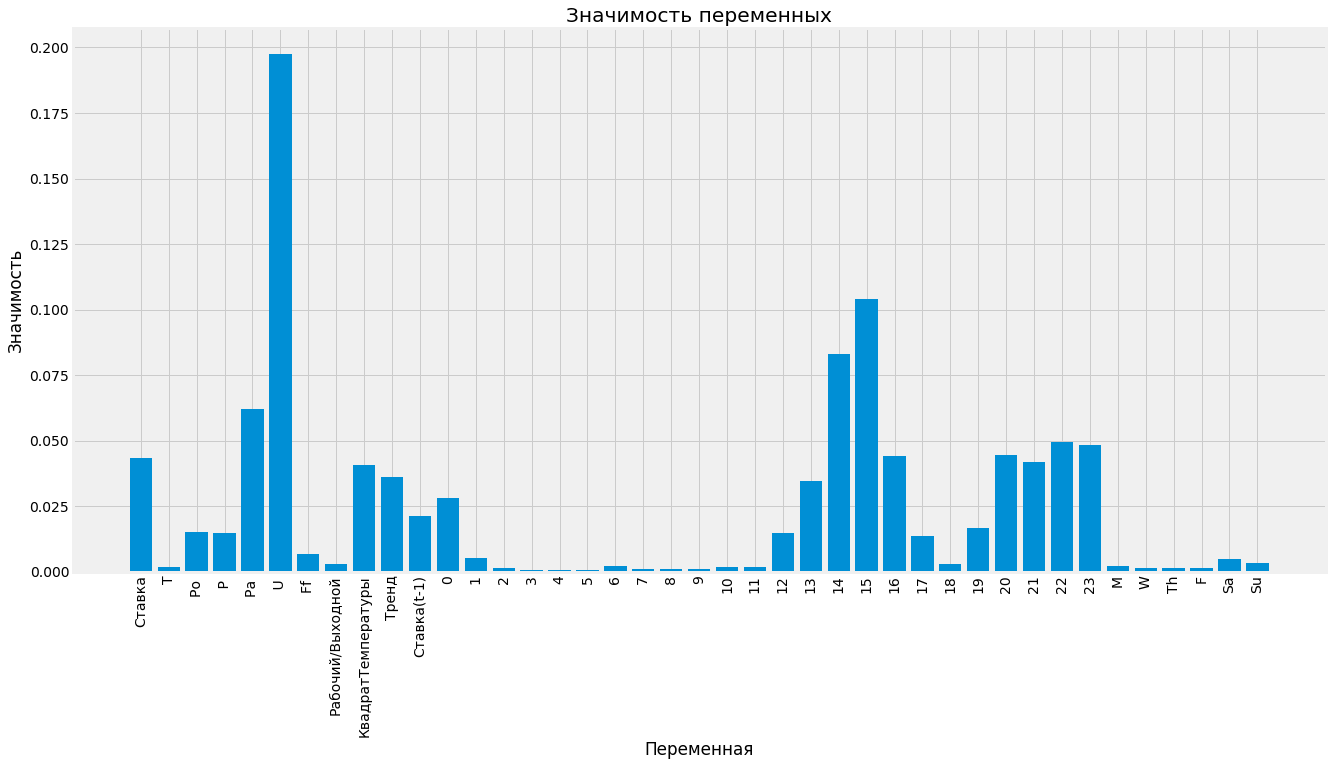

In [16]:
#%matplotlib inline
# Установить стиль
plt.figure(figsize=(20,10))
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Сделать гистограмму
plt.bar(x_values, importances, orientation = 'vertical')
# Галочки меток для оси x
plt.xticks(x_values, feature_list, rotation='vertical')
# Оси метки и заголовок
plt.ylabel('Значимость'); plt.xlabel('Переменная'); plt.title('Значимость переменных');
plt.show()